# HOTEL BOOKING DEMAND ANALYSIS
### Made By - [`Pratyush Puri`](https://www.pratyushpuri.space)
### [`GitHub`](https://www.github.com/PratyushPuri) --- [`Linkedin`](https://www.linkedin.com/in/pratyushpuri)

<br><br><br><br>

## DATA LOADING AND INITIAL EXPLORATION

In [1]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

#ignoring warnings (if any)
w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
#loading the dataset
url = '/kaggle/input/hotel-booking-demand/hotel_bookings.csv'
df = pd.read_csv(url)

#sample checking
display(df.sample(7))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9850,Resort Hotel,1,84,2017,January,2,12,4,12,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,242.0,NaN,0,Transient,33.31,0,1,No-Show,2017-01-12
4833,Resort Hotel,0,171,2016,April,15,4,1,1,2,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,0,Non Refund,298.0,NaN,0,Transient-Party,85.00,0,0,Check-Out,2016-04-06
109822,City Hotel,0,34,2017,April,15,15,1,1,2,0.0,0,SC,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,120.00,0,1,Check-Out,2017-04-17
3676,Resort Hotel,0,165,2015,December,53,30,0,4,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,308.0,NaN,122,Transient-Party,138.50,0,0,Check-Out,2016-01-03
36355,Resort Hotel,0,126,2017,May,19,12,2,4,2,0.0,1,HB,CZE,Online TA,TA/TO,0,0,0,A,C,2,No Deposit,241.0,NaN,0,Transient,88.55,0,2,Check-Out,2017-05-18
112851,City Hotel,0,215,2017,May,21,26,1,2,2,1.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,143.10,0,3,Check-Out,2017-05-29
10455,Resort Hotel,1,86,2017,March,10,9,0,3,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,67.0,NaN,0,Transient,46.00,0,0,Canceled,2016-12-13


In [3]:
# checking for number of rows and columns
print(f'Total number of records are {df.shape[0]}')
print(f'Total number of features are {df.shape[1]}')

Total number of records are 119390
Total number of features are 32


In [4]:
#Checking for unique values
display(df.nunique())

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [5]:
# checking the datatypes of all columns present
display(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Describing of all Column names


| Column Name | Description |
| :--- | :--- |
| **`hotel`** | The type of hotel: **H1 = Resort Hotel** or **H2 = City Hotel**. |
| **`is_canceled`** | A flag indicating if the booking was **canceled (1)** or **not (0)**. |
| **`lead_time`** | The number of days between the booking date and the arrival date. |
| **`arrival_date_year`** | The year of the arrival date. |
| **`arrival_date_month`** | The month of the arrival date. |
| **`arrival_date_week_number`** | The week number of the year for the arrival date. |
| **`arrival_date_day_of_month`** | The day of the month for the arrival date. |
| **`stays_in_weekend_nights`** | The number of **weekend nights** (Saturday or Sunday) booked. |
| **`stays_in_week_nights`** | The number of **week nights** (Monday to Friday) booked. |
| **`adults`** | The number of adults in the booking. |
| **`children`** | The number of children in the booking. |
| **`babies`** | The number of babies in the booking. |
| **`meal`** | The type of meal package booked. "TA" means **Travel Agents** and "TO" means **Tour**. |
| **`country`** | The country of origin, represented in the **ISO 3155-3:2013** format. |
| **`market_segment`** | The market segment designation. "TA" means **Travel Agents** and "TO" means **Tour**. |
| **`distribution_channel`** | The booking distribution channel. "TA" means **Travel Agents** and "TO" means **Tour Operators**. |
| **`is_repeated_guest`** | A flag indicating if the guest is a **repeated guest (1)** or **not (0)**. |
| **`previous_cancellations`** | The number of previous bookings that were **canceled by the customer**. |
| **`previous_bookings_not_canceled`** | The number of previous bookings that were **not canceled by the customer**. |
| **`reserved_room_type`** | The code for the room type reserved. |
| **`assigned_room_type`** | The code for the room type assigned, which may differ from the reserved type. |
| **`booking_changes`** | The number of changes or amendments made to the booking. |
| **`deposit_type`** | The type of deposit made to guarantee the booking. |
| **`agent`** | The ID of the travel agency that made the booking. |
| **`company`** | The ID of the company or entity responsible for the booking payment. |
| **`days_in_waiting_list`** | The number of days the booking was on a waiting list. |
| **`customer_type`** | The type of booking, such as a **contract** or **transient**. |
| **`adr`** | The **Average Daily Rate**, calculated by dividing the sum of all lodging transactions by the number of staying nights. |
| **`required_car_parking_spaces`** | The number of car parking spaces requested by the customer. |
| **`total_of_special_requests`** | The number of special requests made by the customer (e.g., twin bed, high floor). |
| **`reservation_status`** | The last status of the reservation: **Canceled**, **Check-Out**, or **No-Show**. |
| **`reservation_status_date`** | The date on which the last status was set. |

In [6]:
#checking the names of the columns present
display(df.columns.to_list())

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

<Axes: ylabel='Density'>

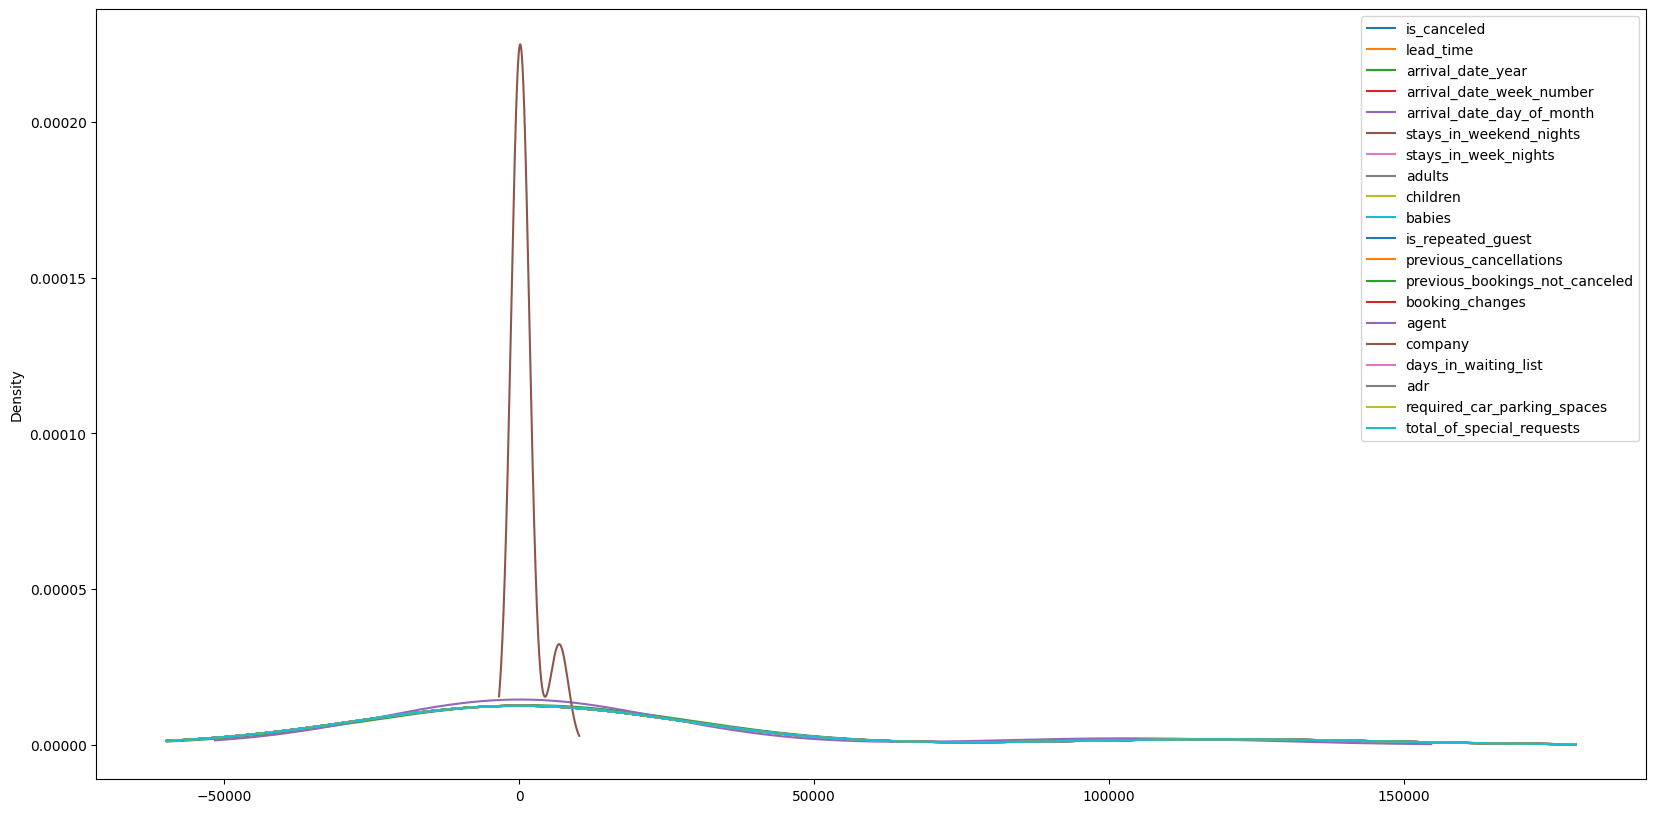

In [7]:
#describing the columns present
display(df.describe(include='all').plot(kind='kde',figsize=(20,10)))

In [8]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


In [9]:
# checking information about all features
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

Here, we can see some columns have wrong `dtypes` as well as some of them are miissing values so in the next section we are going to clean the data accordingly.

## DATA CLEANING

Checking for null Values and handling them

In [10]:
#checking for null values (if any)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'''{col} of type '{df[col].dtype}' has {df[col].isnull().sum()}/{df.shape[0]} null values with {round(((df[col].isnull().sum())/(df.shape[0])*100),3)}%''')

children of type 'float64' has 4/119390 null values with 0.003%
country of type 'object' has 488/119390 null values with 0.409%
agent of type 'float64' has 16340/119390 null values with 13.686%
company of type 'float64' has 112593/119390 null values with 94.307%


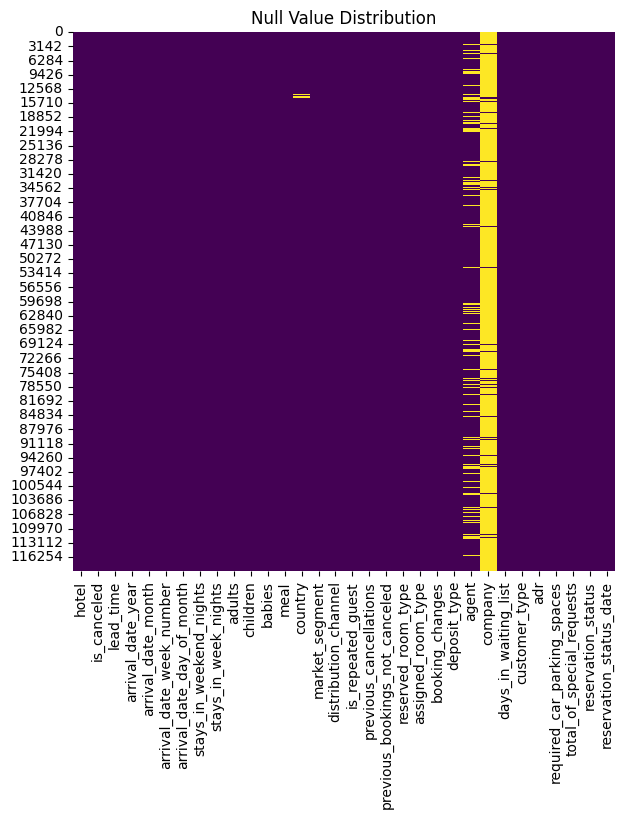

In [11]:
# Plotting null values
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Value Distribution')
plt.show()

In [12]:
#handling of null values

#handling for children column by filling with median
median_children = df['children'].median()
df['children'].fillna(median_children, inplace=True)

#handling for country column
df['country'].fillna('Unknown', inplace=True)

#handling for agent column
median_agent = df['agent'].median()
df['agent'].fillna(median_agent, inplace=True)

#handling for company columns
'''
since almost 94% of the values are null, we should drop such columns (since it does not have a very much impact on our analysis)
'''
df.drop(['company'], axis=1, inplace=True)

In [13]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Here, we can see columns `children` and `agent` is float but should be integer, `reservation_status_date` is object but should be datetime type.

In [14]:
# Convert 'children' to int
df['children'] = df['children'].astype(int)

# Convert 'agent' to int
df['agent'] = df['agent'].astype(int)

# Convert 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the changes
display(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [15]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
22806,Resort Hotel,0,7,2016,April,15,6,0,1,1,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314,0,Transient-Party,40.32,0,0,Check-Out,2016-04-07


## EXPLORATORY DATA ANALYSIS

####	What is the average lead time for bookings?

In [16]:
# Calculate the average lead time
average_lead_time = df['lead_time'].mean()

# Display the average lead time
print(f'The average lead time for bookings is: {average_lead_time:.2f} days')

The average lead time for bookings is: 104.01 days


#### What is the distribution of bookings by hotel type?

In [17]:
# Get the count of bookings for each hotel type
hotel_counts = df['hotel'].value_counts()

# Display the counts
print("Distribution of bookings by hotel type:")
display(hotel_counts)

Distribution of bookings by hotel type:


hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

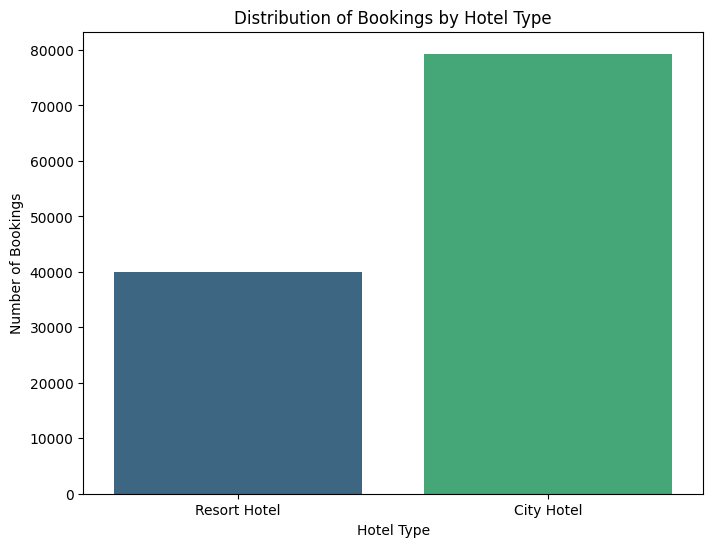

In [18]:
# Create a bar plot of the hotel type distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', palette='viridis')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

####	What is the most common arrival month for bookings?

In [19]:
# Calculate cancellation rate per month
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame by month
monthly_cancellation['arrival_date_month'] = pd.Categorical(monthly_cancellation['arrival_date_month'], categories=month_order, ordered=True)
monthly_cancellation = monthly_cancellation.sort_values('arrival_date_month')

# Display the monthly cancellation rates
print("Monthly Cancellation Rates:")
display(monthly_cancellation)

Monthly Cancellation Rates:


,arrival_date_month,is_canceled
4,January,0.304773
3,February,0.334160
7,March,0.321523
0,April,0.407972
8,May,0.396658
6,June,0.414572
5,July,0.374536
1,August,0.377531
11,September,0.391702
10,October,0.380466


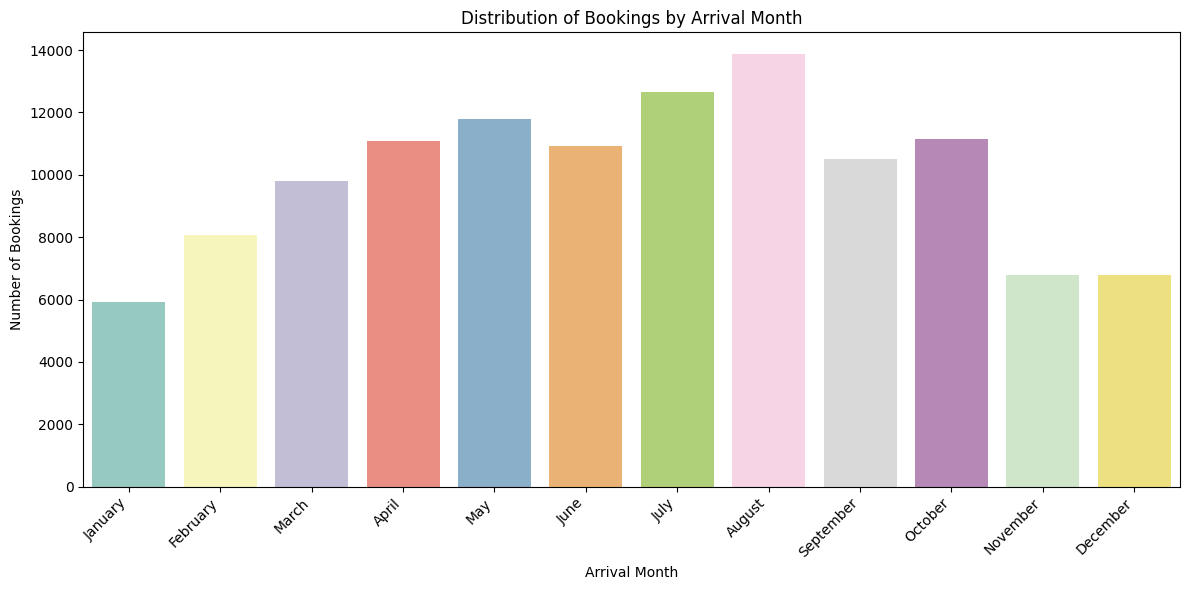

In [20]:
# Get the count of bookings for each arrival month
month_counts = df['arrival_date_month'].value_counts().reset_index()
month_counts.columns = ['arrival_month', 'booking_count']

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame by month
month_counts['arrival_month'] = pd.Categorical(month_counts['arrival_month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values('arrival_month')

# Create a bar plot of monthly booking counts
plt.figure(figsize=(12, 6))
sns.barplot(data=month_counts, x='arrival_month', y='booking_count', palette='Set3')
plt.title('Distribution of Bookings by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####	How many bookings were canceled?

In [21]:
# Filter for canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]

# Get the count of canceled bookings
num_canceled_bookings = canceled_bookings.shape[0]

# Display the number of canceled bookings
print(f'The total number of canceled bookings is: {num_canceled_bookings}')

The total number of canceled bookings is: 44224


In [22]:
# Get the count of bookings for each arrival month
month_counts = df['arrival_date_month'].value_counts()

# Get the most common arrival month
most_common_month = month_counts.index[0]
count_most_common_month = month_counts.iloc[0]

# Display the counts and the most common month
print("Distribution of bookings by arrival month:")
display(month_counts)
print(f'\nThe most common arrival month is: {most_common_month} with {count_most_common_month} bookings')

Distribution of bookings by arrival month:


arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64


The most common arrival month is: August with 13877 bookings


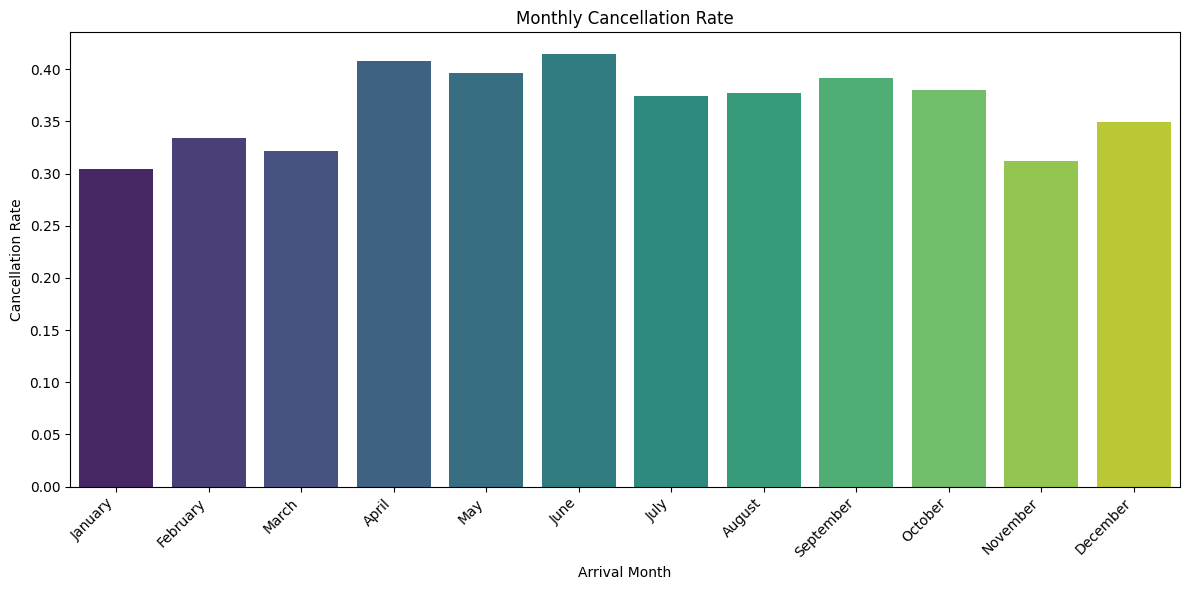

In [23]:
# Create a bar plot of monthly cancellation rates
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_cancellation, x='arrival_date_month', y='is_canceled', palette='viridis')
plt.title('Monthly Cancellation Rate')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### What is the average number of special requests per booking?

In [24]:
# Calculate the average number of special requests
average_special_requests = df['total_of_special_requests'].mean()

# Display the average number of special requests
print(f'The average number of special requests per booking is: {average_special_requests:.2f}')

The average number of special requests per booking is: 0.57


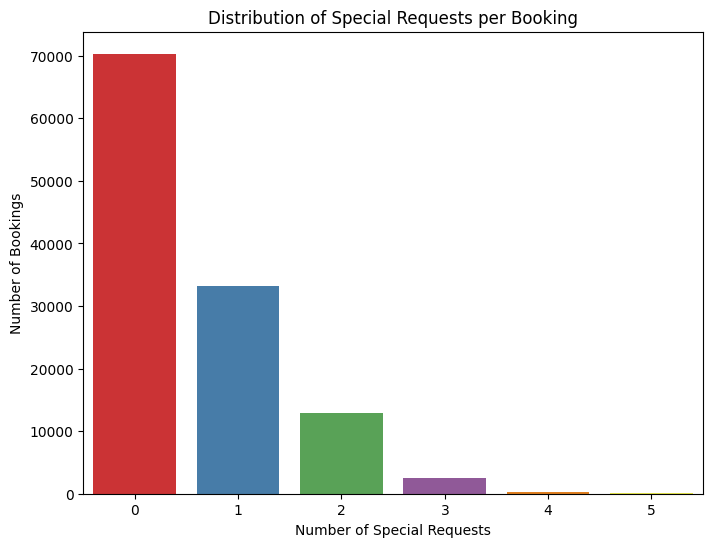

In [25]:
# Visualize the distribution of special requests
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='total_of_special_requests', palette='Set1')
plt.title('Distribution of Special Requests per Booking')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.show()

#### Which country has the highest number of bookings?

In [26]:
# Get the count of bookings for each country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'booking_count']

# Find the country with the highest number of bookings
most_bookings_country = country_counts.iloc[0]['country']
count_most_bookings = country_counts.iloc[0]['booking_count']

# Display the country with the highest number of bookings
print(f'The country with the highest number of bookings is: {most_bookings_country} with {count_most_bookings} bookings')

The country with the highest number of bookings is: PRT with 48590 bookings


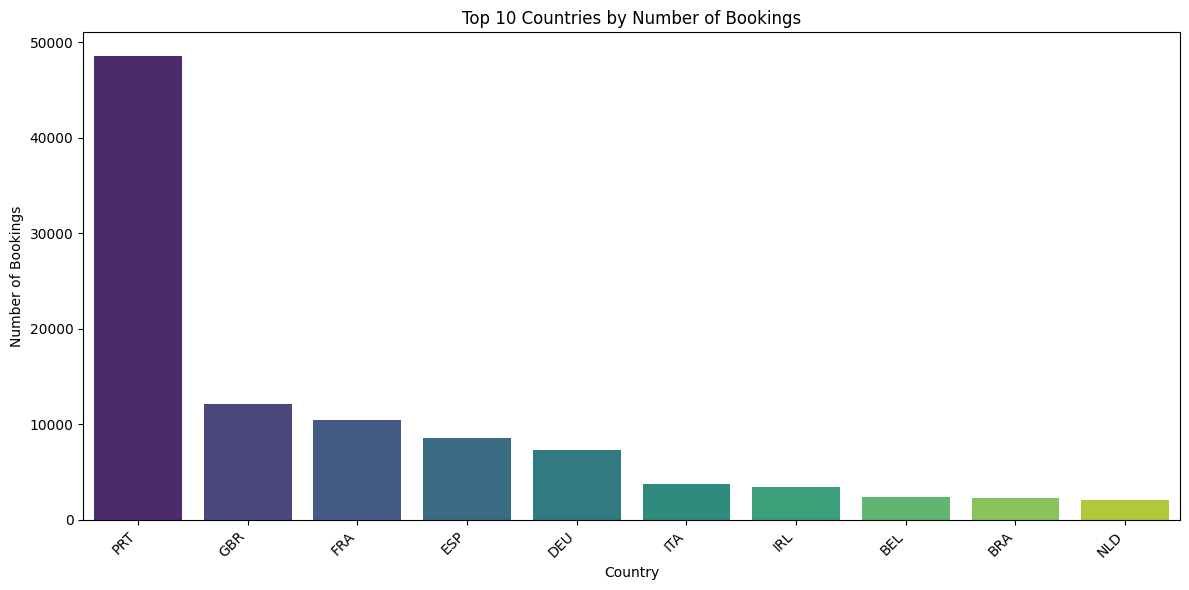

In [27]:
# Visualize the top 10 countries by booking count
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts.head(10), x='country', y='booking_count', palette='viridis')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####	What is the average daily rate (ADR) for each hotel type?

Average Daily Rate (ADR) by Hotel Type:


,hotel,adr
0,City Hotel,105.304465
1,Resort Hotel,94.952930


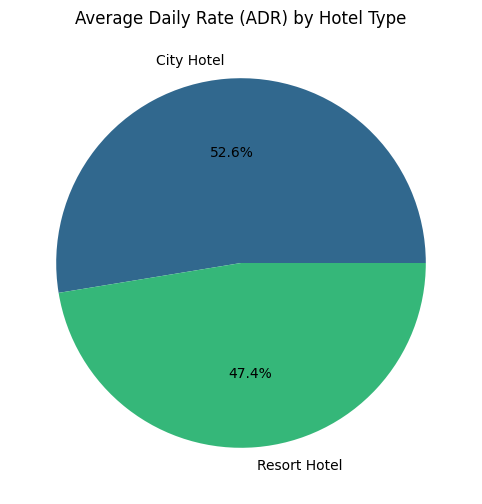

In [28]:
# Calculate the average ADR for each hotel type
average_adr_by_hotel = df.groupby('hotel')['adr'].mean().reset_index()

# Display the average ADRs
print("Average Daily Rate (ADR) by Hotel Type:")
display(average_adr_by_hotel)

# Visualize the average ADR by hotel type
plt.figure(figsize=(8, 6))
plt.pie(average_adr_by_hotel['adr'], labels=average_adr_by_hotel['hotel'],
        autopct='%1.1f%%', colors=sns.color_palette('viridis', len(average_adr_by_hotel)))
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.show()

####	What percentage of guests required car parking spaces?

In [29]:
# Filter for bookings where car parking was required
parking_required_df = df[df['required_car_parking_spaces'] > 0]

# Get the number of bookings where parking was required
num_parking_required = parking_required_df.shape[0]

# Get the total number of bookings
total_bookings = df.shape[0]

# Calculate the percentage
percentage_parking_required = (num_parking_required / total_bookings) * 100

# Display the percentage
print(f'The percentage of guests who required car parking spaces is: {percentage_parking_required:.2f}%')

The percentage of guests who required car parking spaces is: 6.21%


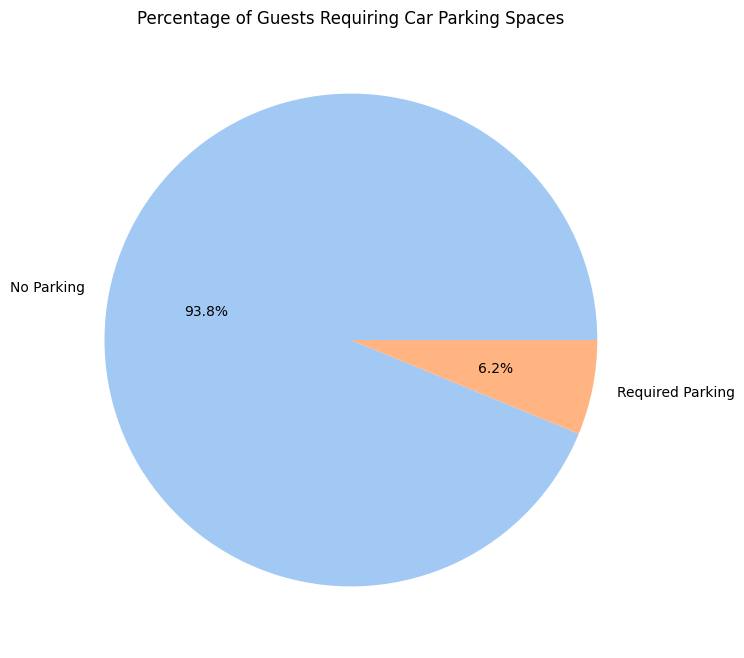

In [30]:
# Data for the pie chart
parking_counts = df['required_car_parking_spaces'].apply(lambda x: 'Required Parking' if x > 0 else 'No Parking').value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of Guests Requiring Car Parking Spaces')
plt.show()

####	What is the average stay duration in week nights and weekend nights?

The average stay duration in week nights is: 2.50 nights
The average stay duration in weekend nights is: 0.93 nights


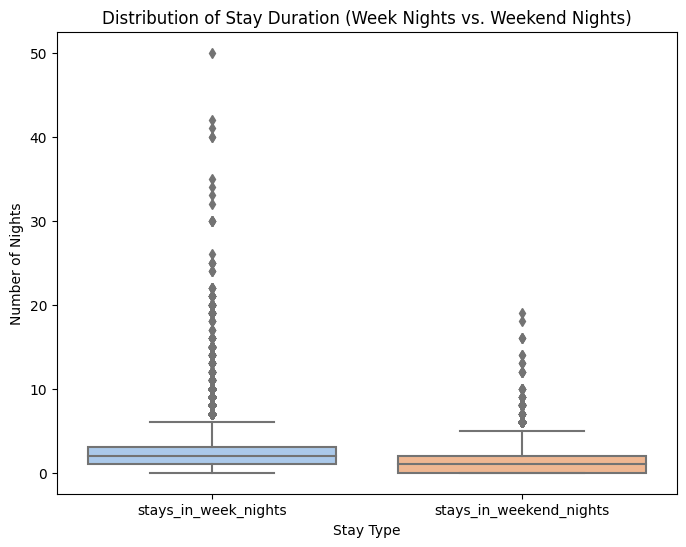

In [31]:
# Calculate the average stay duration in week nights and weekend nights
average_week_nights = df['stays_in_week_nights'].mean()
average_weekend_nights = df['stays_in_weekend_nights'].mean()

# Display the average stay durations
print(f'The average stay duration in week nights is: {average_week_nights:.2f} nights')
print(f'The average stay duration in weekend nights is: {average_weekend_nights:.2f} nights')

# Prepare data for visualization (combine into a single DataFrame)
stay_duration_data = df[['stays_in_week_nights', 'stays_in_weekend_nights']].melt(var_name='Stay Type', value_name='Number of Nights')

# Visualize the distribution of stay durations using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=stay_duration_data, x='Stay Type', y='Number of Nights', palette='pastel')
plt.title('Distribution of Stay Duration (Week Nights vs. Weekend Nights)')
plt.xlabel('Stay Type')
plt.ylabel('Number of Nights')
plt.show()

#### How many bookings were made through travel agents?

In [32]:
# Filter for bookings made through TA/TO (Travel Agents/Tour Operators)
ta_to_bookings = df[df['distribution_channel'] == 'TA/TO']

# Get the count of TA/TO bookings
num_ta_to_bookings = ta_to_bookings.shape[0]

# Display the number of TA/TO bookings
print(f'The total number of bookings made through Travel Agents/Tour Operators (TA/TO) is: {num_ta_to_bookings}')

The total number of bookings made through Travel Agents/Tour Operators (TA/TO) is: 97870


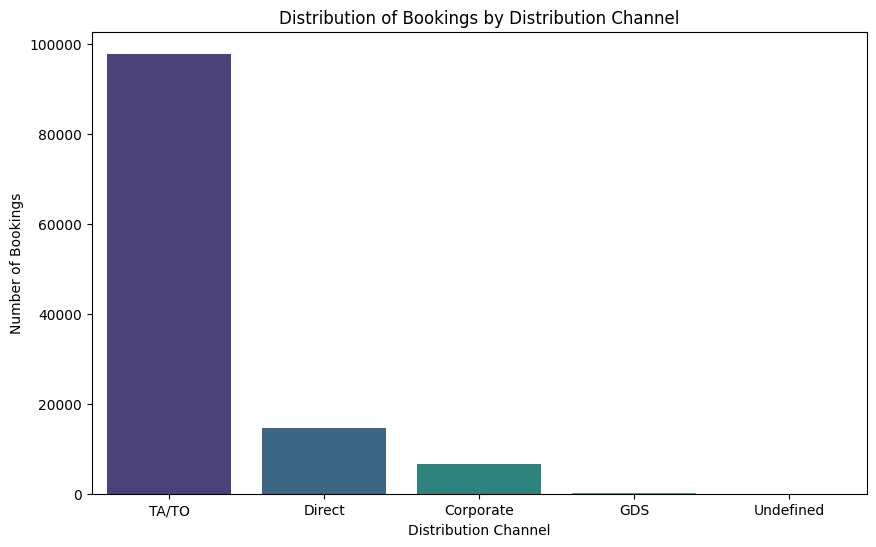

In [33]:
# Get the count of bookings for each distribution channel
distribution_channel_counts = df['distribution_channel'].value_counts().reset_index()
distribution_channel_counts.columns = ['distribution_channel', 'booking_count']

# Visualize the distribution of bookings by distribution channel
plt.figure(figsize=(10, 6))
sns.barplot(data=distribution_channel_counts, x='distribution_channel', y='booking_count', palette='viridis')
plt.title('Distribution of Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

####	What is the cancellation rate for each hotel type?

Cancellation Rate by Hotel Type:


,hotel,is_canceled
0,City Hotel,0.417270
1,Resort Hotel,0.277634


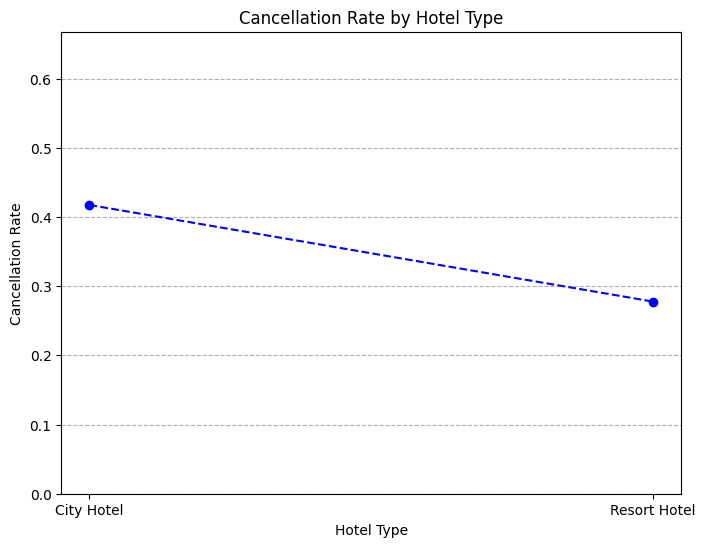

In [34]:
# Calculate cancellation rate per hotel type
cancellation_rate_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

# Display the cancellation rates
print("Cancellation Rate by Hotel Type:")
display(cancellation_rate_by_hotel)

# Visualize the cancellation rate by hotel type using a line plot with markers
plt.figure(figsize=(8, 6))
plt.plot(cancellation_rate_by_hotel['hotel'], cancellation_rate_by_hotel['is_canceled'], marker='o', linestyle='--', color='blue')
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0, cancellation_rate_by_hotel['is_canceled'].max() * 1.6)
plt.grid(axis='y', linestyle='--')
plt.show()

####	What is the average ADR per market segment?

In [35]:
# Calculate the average ADR for each market segment
average_adr_by_market_segment = df.groupby('market_segment')['adr'].mean().reset_index()

# Sort for better visualization
average_adr_by_market_segment = average_adr_by_market_segment.sort_values('adr', ascending=False)

# Display the average ADRs
print("Average Daily Rate (ADR) by Market Segment:")
display(average_adr_by_market_segment)

Average Daily Rate (ADR) by Market Segment:


,market_segment,adr
6,Online TA,117.197063
3,Direct,115.445175
0,Aviation,100.142110
5,Offline TA/TO,87.354783
4,Groups,79.479472
2,Corporate,69.358952
7,Undefined,15.000000
1,Complementary,2.886366


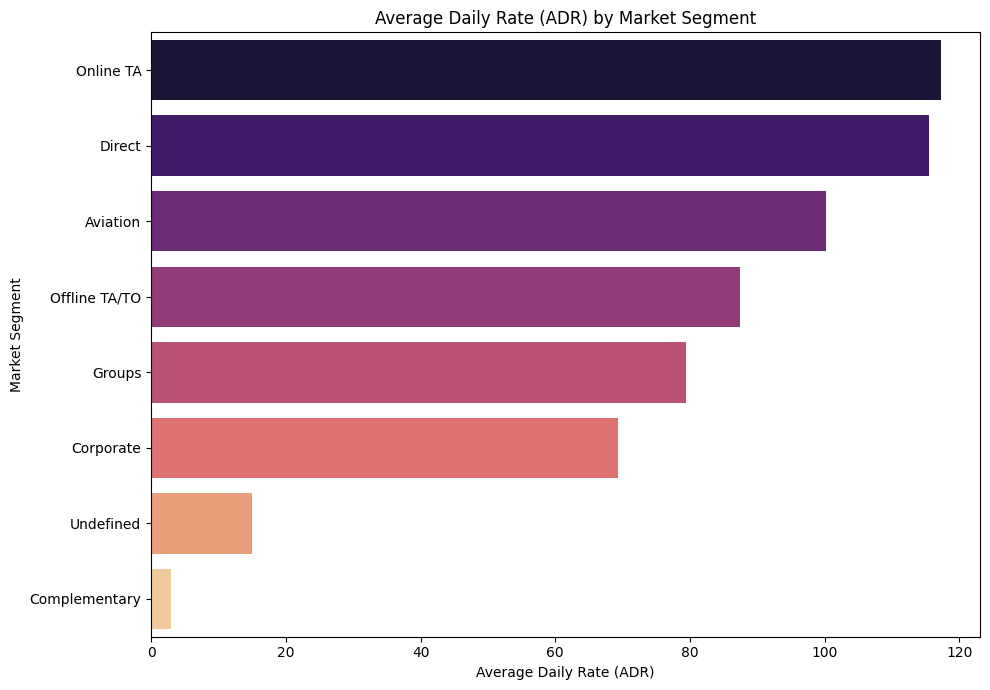

In [36]:
# Visualize the average ADR by market segment using a horizontal bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=average_adr_by_market_segment, y='market_segment', x='adr', palette='magma')
plt.title('Average Daily Rate (ADR) by Market Segment')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Market Segment')
plt.tight_layout()
plt.show()

####	What is the relationship between lead time and cancellation rate?

In [37]:
# Calculate cancellation rate per lead time
lead_time_cancellation = df.groupby('lead_time')['is_canceled'].mean().reset_index()

# Display the cancellation rates for different lead times (first few rows)
print("Cancellation Rate by Lead Time (first 10 lead times):")
display(lead_time_cancellation.head(10))

Cancellation Rate by Lead Time (first 10 lead times):


,lead_time,is_canceled
0,0,0.067770
1,1,0.092775
2,2,0.102948
3,3,0.100220
4,4,0.102624
5,5,0.131629
6,6,0.139792
7,7,0.129226
8,8,0.195958
9,9,0.220766


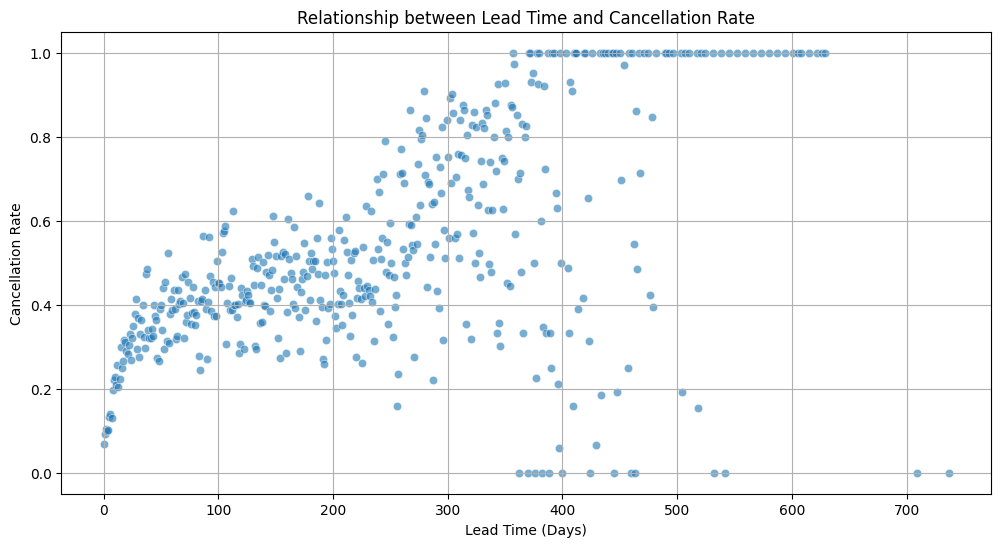

In [38]:
# Visualize the relationship between lead time and cancellation rate using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=lead_time_cancellation, x='lead_time', y='is_canceled', alpha=0.6)
plt.title('Relationship between Lead Time and Cancellation Rate')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()

####	Which distribution channel has the highest number of bookings?

In [39]:
# Get the count of bookings for each distribution channel
distribution_channel_counts = df['distribution_channel'].value_counts().reset_index()
distribution_channel_counts.columns = ['distribution_channel', 'booking_count']

# Display the counts
print("Distribution of Bookings by Distribution Channel:")
display(distribution_channel_counts)

Distribution of Bookings by Distribution Channel:


,distribution_channel,booking_count
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193
4,Undefined,5


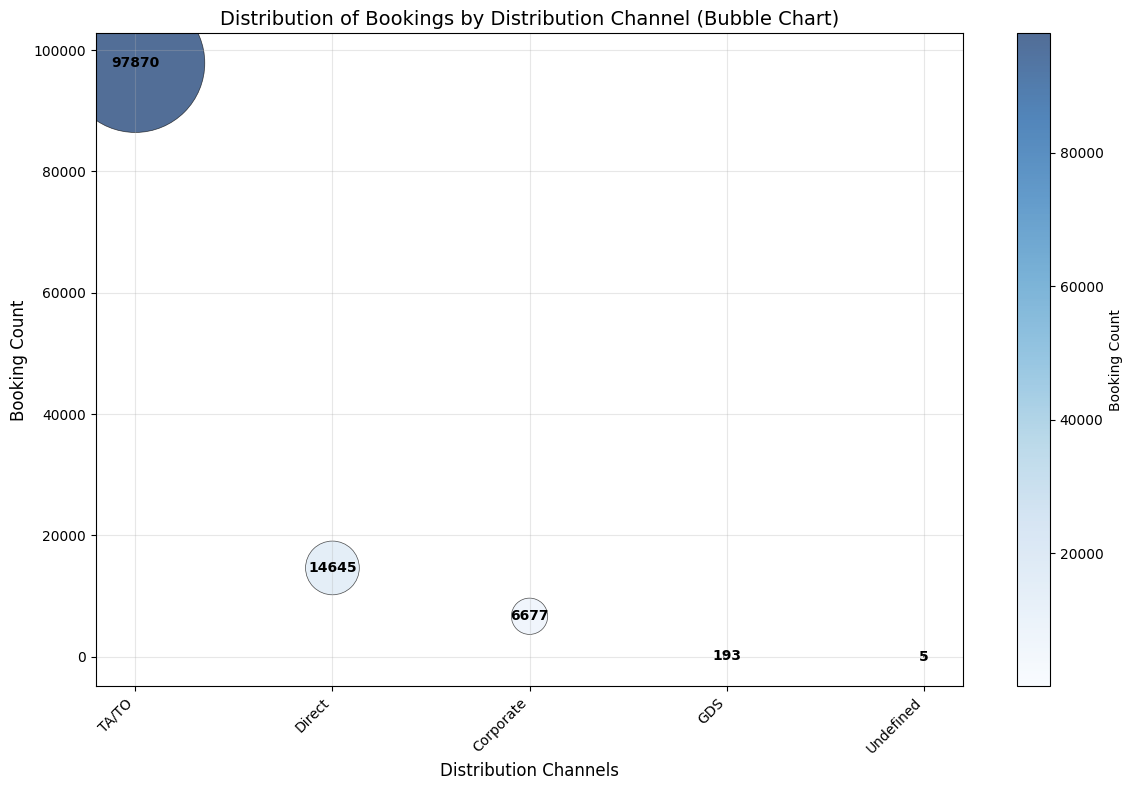

In [40]:
# Prepare data for bubble chart
categories = distribution_channel_counts['distribution_channel'].tolist()
values = distribution_channel_counts['booking_count'].tolist()

# Normalizing bubble sizes for better visualization
max_size = max(values)
bubble_sizes = [size/max_size * 10000 for size in values]

# Create the bubble chart
plt.figure(figsize=(12, 8))

# Create bubbles
scatter = plt.scatter(range(len(categories)), values, s=bubble_sizes, alpha=0.7,
                     c=values, cmap='Blues', edgecolors='black', linewidth=0.5)

# Add value labels on bubbles
for i, (category, value) in enumerate(zip(categories, values)):
    plt.annotate(f'{value}', (i, value), ha='center', va='center', fontweight='bold')

# Customize the chart
plt.title('Distribution of Bookings by Distribution Channel (Bubble Chart)', fontsize=14)
plt.xlabel('Distribution Channels', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.tight_layout()

# Add colorbar
plt.colorbar(scatter, label='Booking Count')

plt.grid(True, alpha=0.3)
plt.show()

####	What is the average number of previous cancellations by hotel type?

In [41]:
# Calculate the average number of previous cancellations by hotel type
average_previous_cancellations_by_hotel = df.groupby('hotel')['previous_cancellations'].mean().reset_index()

# Display the average previous cancellations
print("Average Number of Previous Cancellations by Hotel Type:")
display(average_previous_cancellations_by_hotel)

Average Number of Previous Cancellations by Hotel Type:


,hotel,previous_cancellations
0,City Hotel,0.079743
1,Resort Hotel,0.101722


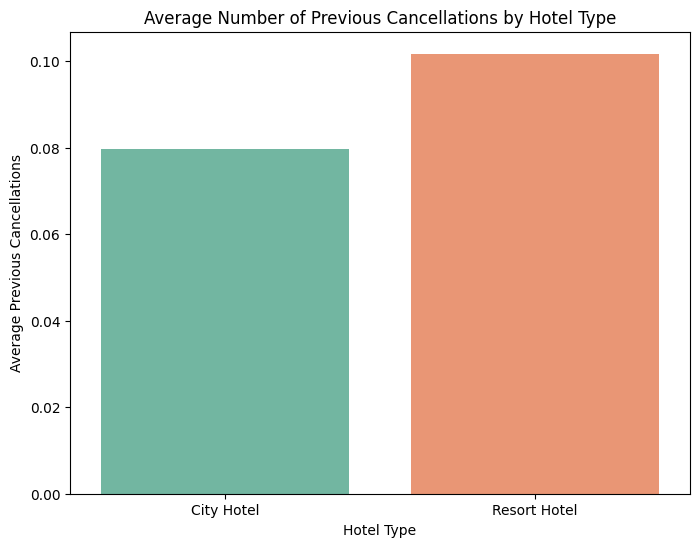

In [42]:
# Visualize the average number of previous cancellations by hotel type
plt.figure(figsize=(8, 6))
sns.barplot(data=average_previous_cancellations_by_hotel, x='hotel', y='previous_cancellations', palette='Set2')
plt.title('Average Number of Previous Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Previous Cancellations')
plt.show()

#### What is the trend of ADR over the years?

In [43]:
# Calculate the average ADR for each year
average_adr_by_year = df.groupby('arrival_date_year')['adr'].mean().reset_index()

# Display the average ADRs by year
print("Average Daily Rate (ADR) Trend Over the Years:")
display(average_adr_by_year)

Average Daily Rate (ADR) Trend Over the Years:


,arrival_date_year,adr
0,2015,87.178515
1,2016,98.325863
2,2017,114.637950


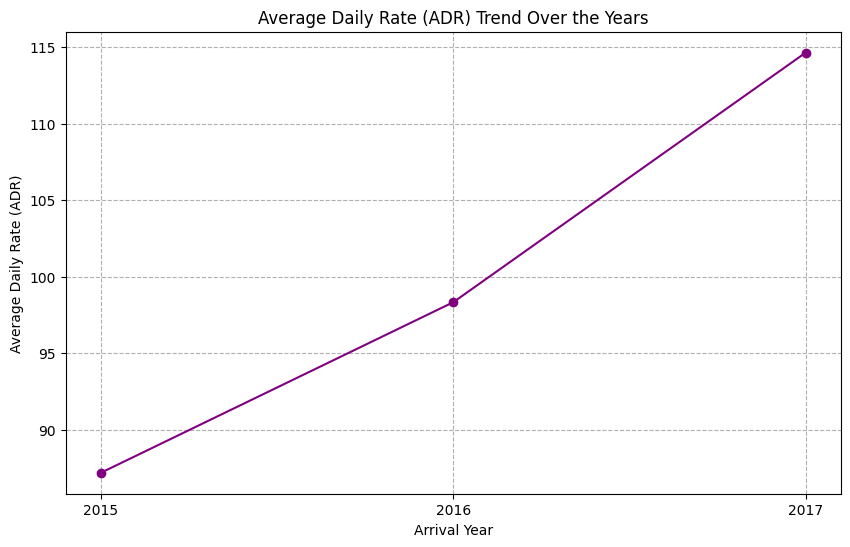

In [44]:
# Visualize the trend of average ADR over the years using a line chart with markers
plt.figure(figsize=(10, 6))
plt.plot(average_adr_by_year['arrival_date_year'], average_adr_by_year['adr'], marker='o', linestyle='-', color='purple')
plt.title('Average Daily Rate (ADR) Trend Over the Years')
plt.xlabel('Arrival Year')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(average_adr_by_year['arrival_date_year']) # Ensure all years are shown as ticks
plt.grid(True, linestyle='--')
plt.show()

####	Which month has the highest revenue?

In [45]:
# Calculate total stay duration in nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate revenue for each booking (ADR * total nights). Handle potential division by zero or negative ADR.
df['revenue'] = df['adr'] * df['total_nights']

# Group by arrival month and sum the revenue
monthly_revenue = df.groupby('arrival_date_month')['revenue'].sum().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame by month
monthly_revenue['arrival_date_month'] = pd.Categorical(monthly_revenue['arrival_date_month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('arrival_date_month')

# Display the monthly revenue
print("Total Revenue by Arrival Month:")
display(monthly_revenue)

# Find the month with the highest revenue
highest_revenue_month = monthly_revenue.loc[monthly_revenue['revenue'].idxmax()]
print(f"\nThe month with the highest revenue is: {highest_revenue_month['arrival_date_month']} with a total revenue of {highest_revenue_month['revenue']:.2f}")

Total Revenue by Arrival Month:


,arrival_date_month,revenue
4,January,1273077.43
3,February,1818972.70
7,March,2639221.09
0,April,3710466.14
8,May,4108125.90
6,June,4499387.28
5,July,6587713.64
1,August,7944717.43
11,September,3731917.18
10,October,3009549.50



The month with the highest revenue is: August with a total revenue of 7944717.43


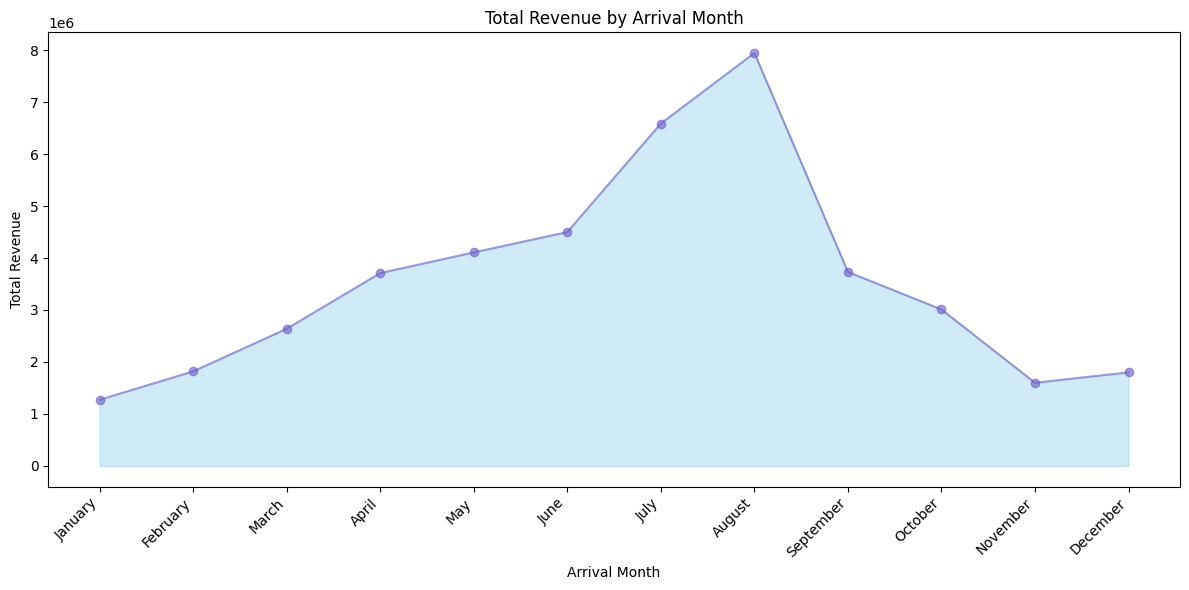

In [46]:
# Visualize the monthly revenue trend using an area chart
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_revenue['arrival_date_month'], monthly_revenue['revenue'], color="skyblue", alpha=0.4)
plt.plot(monthly_revenue['arrival_date_month'], monthly_revenue['revenue'], color="Slateblue", alpha=0.6, marker='o')
plt.title('Total Revenue by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####	What is the impact of special requests on ADR?

In [47]:
# Calculate the average ADR for each number of special requests
average_adr_by_special_requests = df.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Display the average ADRs
print("Average Daily Rate (ADR) by Number of Special Requests:")
display(average_adr_by_special_requests)

Average Daily Rate (ADR) by Number of Special Requests:


,total_of_special_requests,adr
0,0,94.961611
1,1,108.455824
2,2,117.033451
3,3,123.846131
4,4,130.568706
5,5,127.746500


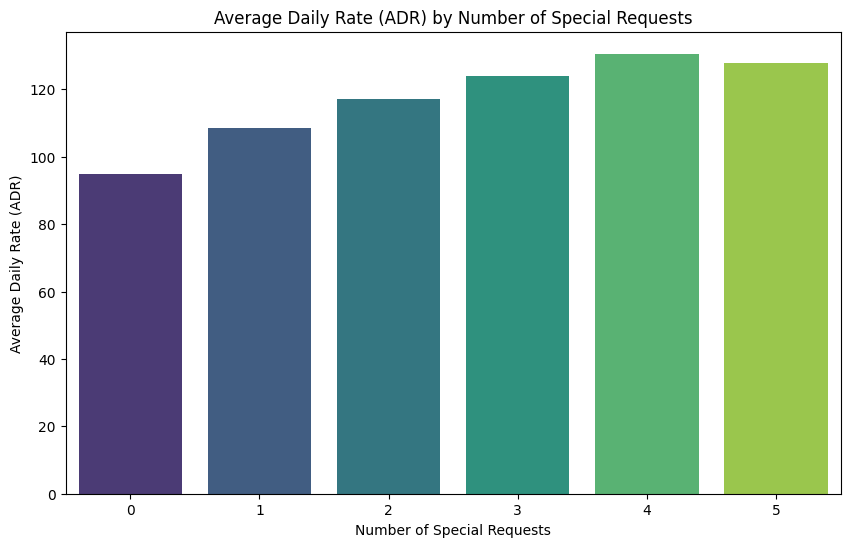

In [48]:
# Visualize the average ADR by number of special requests using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_adr_by_special_requests, x='total_of_special_requests', y='adr', palette='viridis')
plt.title('Average Daily Rate (ADR) by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

####	What is the average stay duration for repeated guests versus new guests?

In [49]:
# Calculate total stay duration in nights (if not already calculated)
if 'total_nights' not in df.columns:
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate the average stay duration for repeated guests vs. new guests
average_stay_by_repeat_guest = df.groupby('is_repeated_guest')['total_nights'].mean().reset_index()

# Map the 'is_repeated_guest' values to descriptive labels
average_stay_by_repeat_guest['is_repeated_guest'] = average_stay_by_repeat_guest['is_repeated_guest'].map({0: 'New Guest', 1: 'Repeated Guest'})

# Display the average stay durations
print("Average Stay Duration (Nights) for Repeated vs. New Guests:")
display(average_stay_by_repeat_guest)

Average Stay Duration (Nights) for Repeated vs. New Guests:


,is_repeated_guest,total_nights
0,New Guest,3.477410
1,Repeated Guest,1.925984


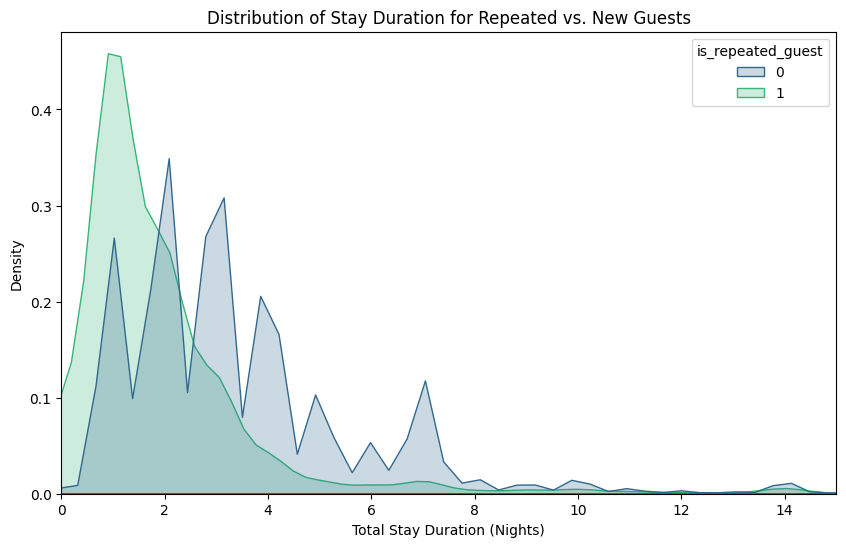

In [50]:
# Visualize the distribution of stay durations for repeated vs. new guests using KDE plot with fill
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='total_nights', hue='is_repeated_guest', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of Stay Duration for Repeated vs. New Guests')
plt.xlabel('Total Stay Duration (Nights)')
plt.ylabel('Density')
plt.xlim(0, 15) # Limit x-axis for better visualization of the main distribution
plt.show()

####	Which room type has the highest number of bookings?

In [51]:
# Get the count of bookings for each reserved room type
room_type_counts = df['reserved_room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'booking_count']

# Find the room type with the highest number of bookings
most_common_room_type = room_type_counts.iloc[0]['room_type']
count_most_common_room_type = room_type_counts.iloc[0]['booking_count']

# Display the room type with the highest number of bookings
print(f'The room type with the highest number of bookings is: {most_common_room_type} with {count_most_common_room_type} bookings')

# Display the counts for all room types
print("\nDistribution of Bookings by Reserved Room Type:")
display(room_type_counts)

The room type with the highest number of bookings is: A with 85994 bookings

Distribution of Bookings by Reserved Room Type:


,room_type,booking_count
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6


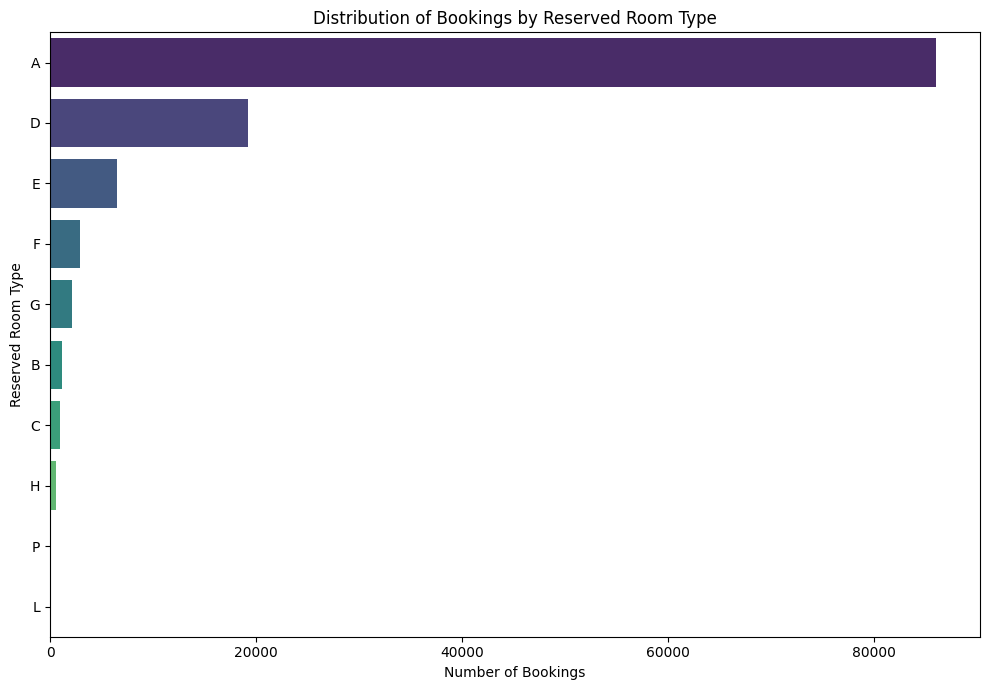

In [52]:
# Visualize the distribution of bookings by reserved room type using a horizontal bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=room_type_counts, y='room_type', x='booking_count', palette='viridis')
plt.title('Distribution of Bookings by Reserved Room Type')
plt.xlabel('Number of Bookings')
plt.ylabel('Reserved Room Type')
plt.tight_layout()
plt.show()

####	What factors significantly impact the cancellation rate?

Correlation of Numerical Features with Cancellation Status:


is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
revenue                           0.046562
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
agent                            -0.051711
previous_bookings_not_canceled   -0.057358
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

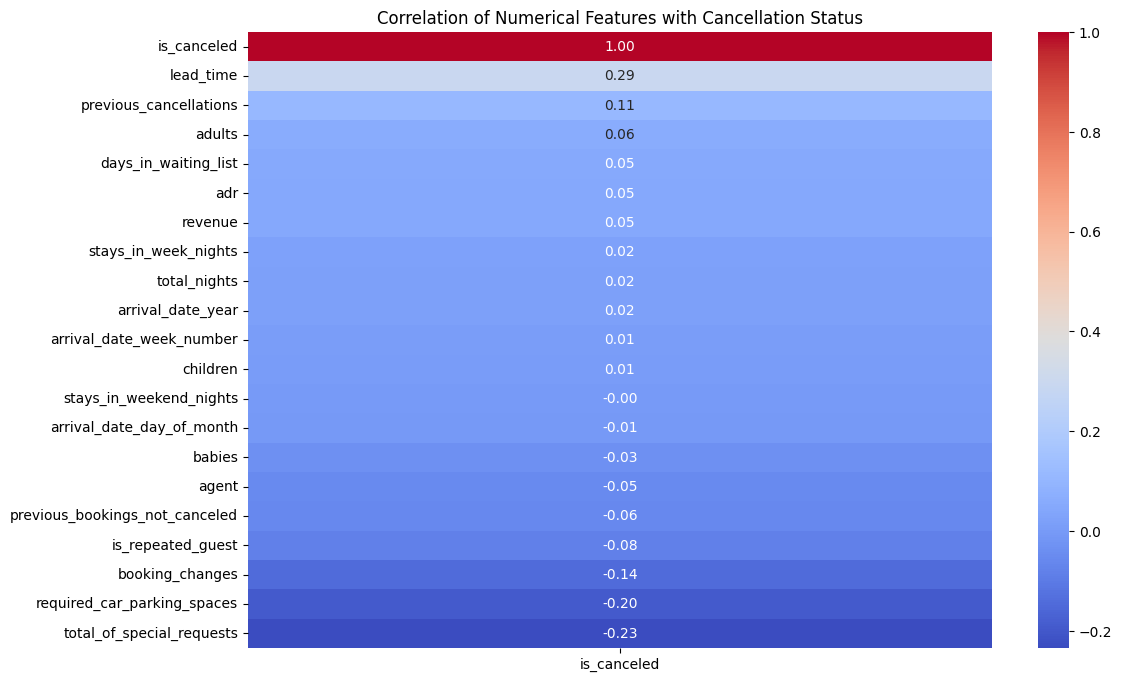

In [53]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Get the correlation of 'is_canceled' with other numerical features
cancellation_correlations = correlation_matrix['is_canceled'].sort_values(ascending=False)

# Display the correlations
print("Correlation of Numerical Features with Cancellation Status:")
display(cancellation_correlations)

# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features with Cancellation Status')
plt.show()

####	How does the ADR vary with the number of adults, children, and babies?

In [54]:
# Group by adults, children, and babies and calculate the average ADR
adr_by_occupants = df.groupby(['adults', 'children', 'babies'])['adr'].mean().reset_index()

# Sort for better visualization of trends
adr_by_occupants = adr_by_occupants.sort_values('adr', ascending=False)

# Display the average ADRs for different occupant combinations (first few rows)
print("Average Daily Rate (ADR) by Number of Adults, Children, and Babies (first 10 combinations):")
display(adr_by_occupants.head(10))

Average Daily Rate (ADR) by Number of Adults, Children, and Babies (first 10 combinations):


,adults,children,babies,adr
28,3,2,0,237.656667
22,2,3,0,227.612131
25,3,0,1,207.610000
12,1,3,0,202.975000
19,2,1,2,201.666667
26,3,1,0,198.405753
29,4,0,0,198.218136
31,4,1,0,194.030000
30,4,0,1,190.000000
20,2,2,0,185.940652


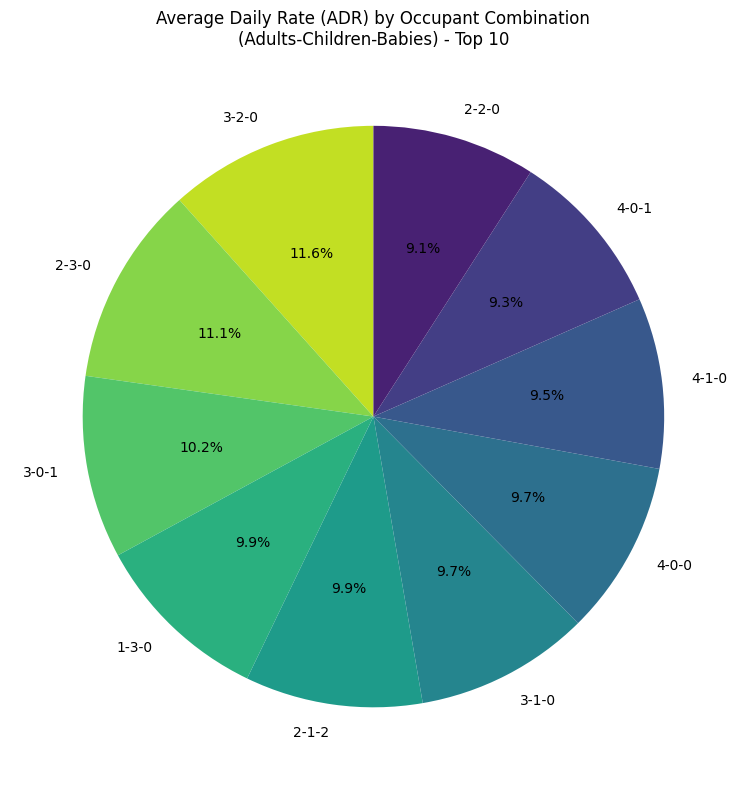

In [55]:
plt.figure(figsize=(10, 8))

# Create labels for the pie chart
labels = adr_by_occupants.head(10).apply(
    lambda row: f'{int(row["adults"])}-{int(row["children"])}-{int(row["babies"])}',
    axis=1
)

# Create the pie chart
plt.pie(adr_by_occupants.head(10)['adr'],
        labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis_r', len(adr_by_occupants.head(10))),
        startangle=90)

plt.title('Average Daily Rate (ADR) by Occupant Combination\n(Adults-Children-Babies) - Top 10')
plt.tight_layout()
plt.show()

####	What is the impact of booking changes on guest satisfaction as indicated by special requests?

In [56]:
# Calculate the average number of special requests for each number of booking changes
special_requests_by_booking_changes = df.groupby('booking_changes')['total_of_special_requests'].mean().reset_index()

# Display the results
print("Average Number of Special Requests by Number of Booking Changes:")
display(special_requests_by_booking_changes)

Average Number of Special Requests by Number of Booking Changes:


,booking_changes,total_of_special_requests
0,0,0.555609
1,1,0.624911
2,2,0.712746
3,3,0.810140
4,4,0.805851
5,5,0.822034
6,6,0.888889
7,7,0.645161
8,8,0.882353
9,9,0.125000


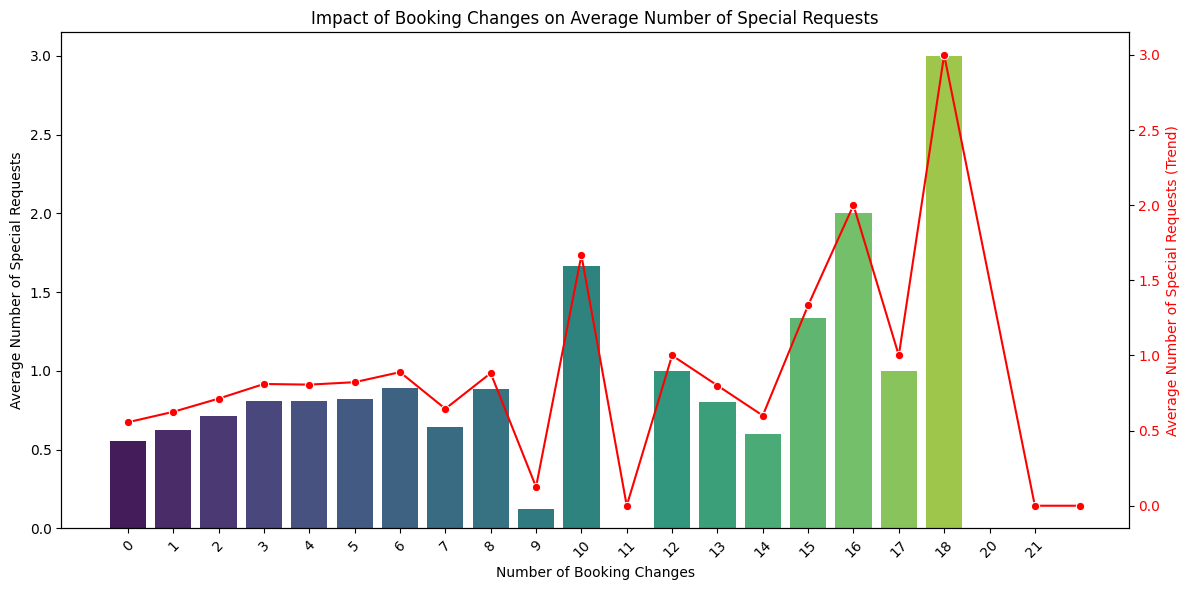

In [57]:
# Visualize the relationship using a combination of charts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average special requests
sns.barplot(data=special_requests_by_booking_changes, x='booking_changes', y='total_of_special_requests', palette='viridis', ax=ax1)
ax1.set_title('Impact of Booking Changes on Average Number of Special Requests')
ax1.set_xlabel('Number of Booking Changes')
ax1.set_ylabel('Average Number of Special Requests')
ax1.tick_params(axis='x', rotation=45)

# Add a line plot for trend (optional, but can show direction)
ax2 = ax1.twinx()
sns.lineplot(data=special_requests_by_booking_changes, x='booking_changes', y='total_of_special_requests', marker='o', color='red', ax=ax2, legend=False)
ax2.set_ylabel('Average Number of Special Requests (Trend)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.tight_layout()
plt.show()

####	What is the seasonal impact on booking cancellations?

In [58]:
# Calculate cancellation rate per month
monthly_cancellation = df.groupby('arrival_date_month')['is_canceled'].mean().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the DataFrame by month
monthly_cancellation['arrival_date_month'] = pd.Categorical(monthly_cancellation['arrival_date_month'], categories=month_order, ordered=True)
monthly_cancellation = monthly_cancellation.sort_values('arrival_date_month')

# Display the monthly cancellation rates
print("Monthly Cancellation Rates:")
display(monthly_cancellation)

Monthly Cancellation Rates:


,arrival_date_month,is_canceled
4,January,0.304773
3,February,0.334160
7,March,0.321523
0,April,0.407972
8,May,0.396658
6,June,0.414572
5,July,0.374536
1,August,0.377531
11,September,0.391702
10,October,0.380466


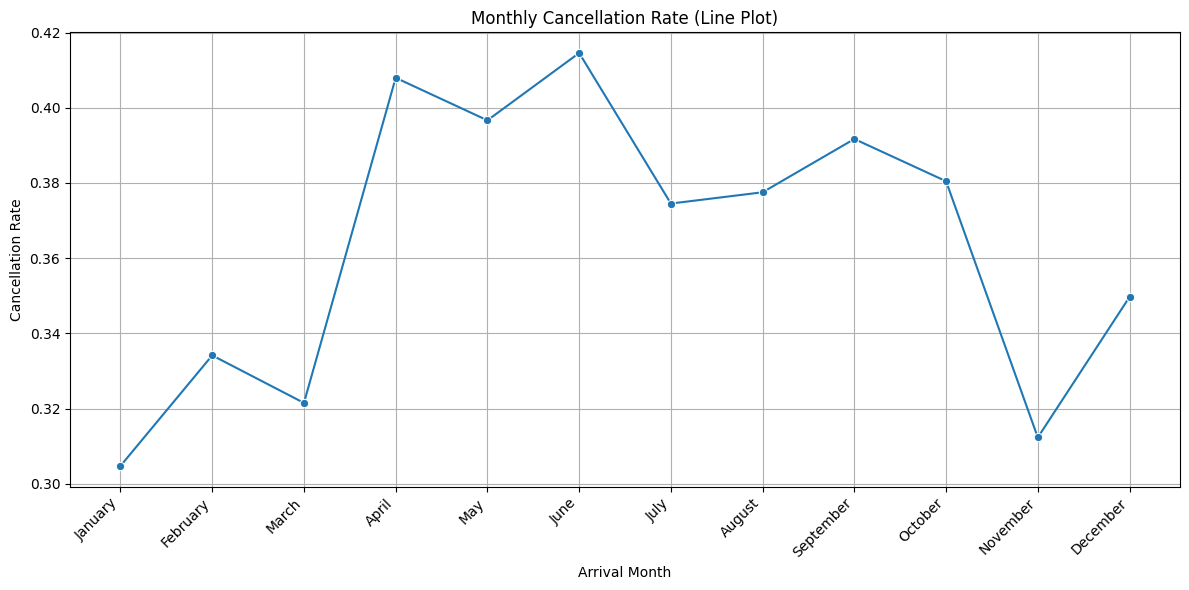

In [59]:
# Visualize the monthly cancellation rates using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancellation, x='arrival_date_month', y='is_canceled', marker='o', palette='viridis')
plt.title('Monthly Cancellation Rate (Line Plot)')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

####	How does the booking lead time distribution vary between different market segments?

In [60]:
# Calculate the median lead time for each market segment
median_lead_time_by_market_segment = df.groupby('market_segment')['lead_time'].median().reset_index()

# Sort for better visualization
median_lead_time_by_market_segment = median_lead_time_by_market_segment.sort_values('lead_time', ascending=False)

# Display the median lead times
print("Median Lead Time by Market Segment:")
display(median_lead_time_by_market_segment)

Median Lead Time by Market Segment:


,market_segment,lead_time
4,Groups,162.0
5,Offline TA/TO,109.0
6,Online TA,58.0
3,Direct,16.0
2,Corporate,7.0
0,Aviation,3.0
1,Complementary,3.0
7,Undefined,1.5


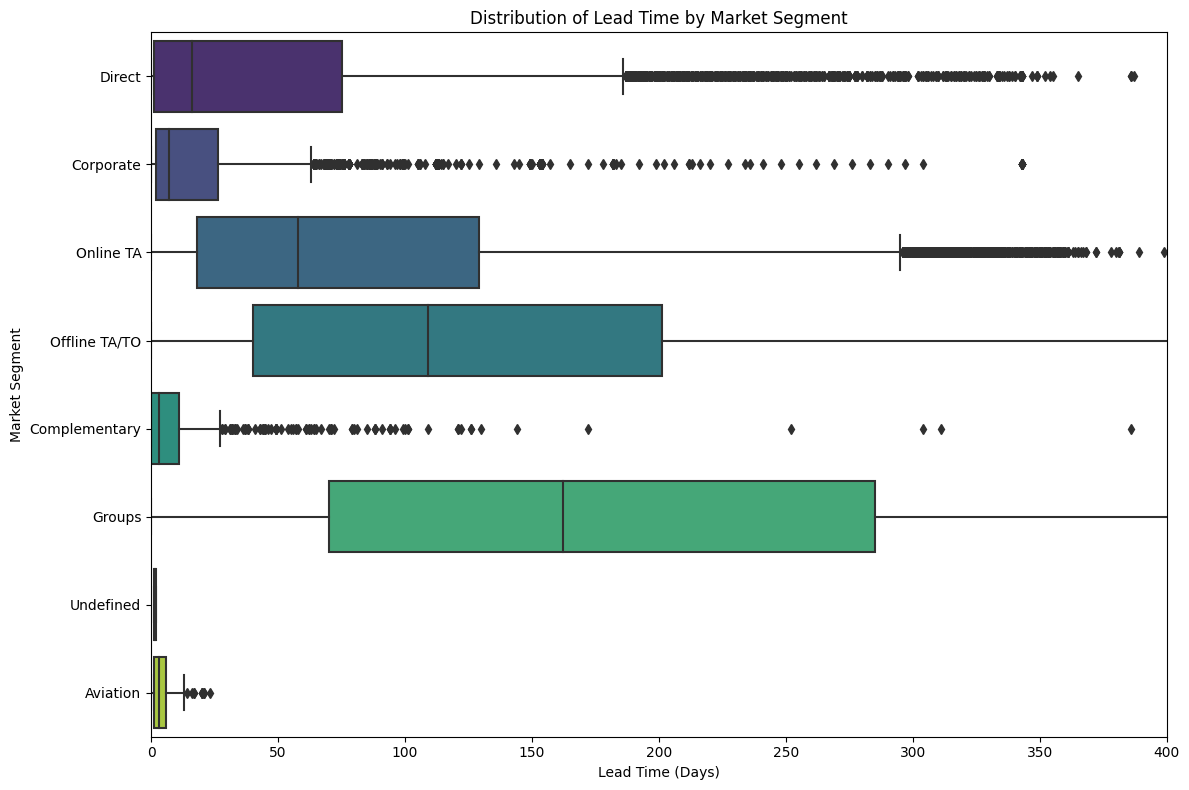

In [61]:
# Visualize the distribution of lead time by market segment using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='market_segment', x='lead_time', palette='viridis')
plt.title('Distribution of Lead Time by Market Segment')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Market Segment')
plt.xlim(0, 400) # Limit x-axis for better visualization
plt.tight_layout()
plt.show()

## OUTLIER ANALYSIS
<br><br>

### Outlier Detection

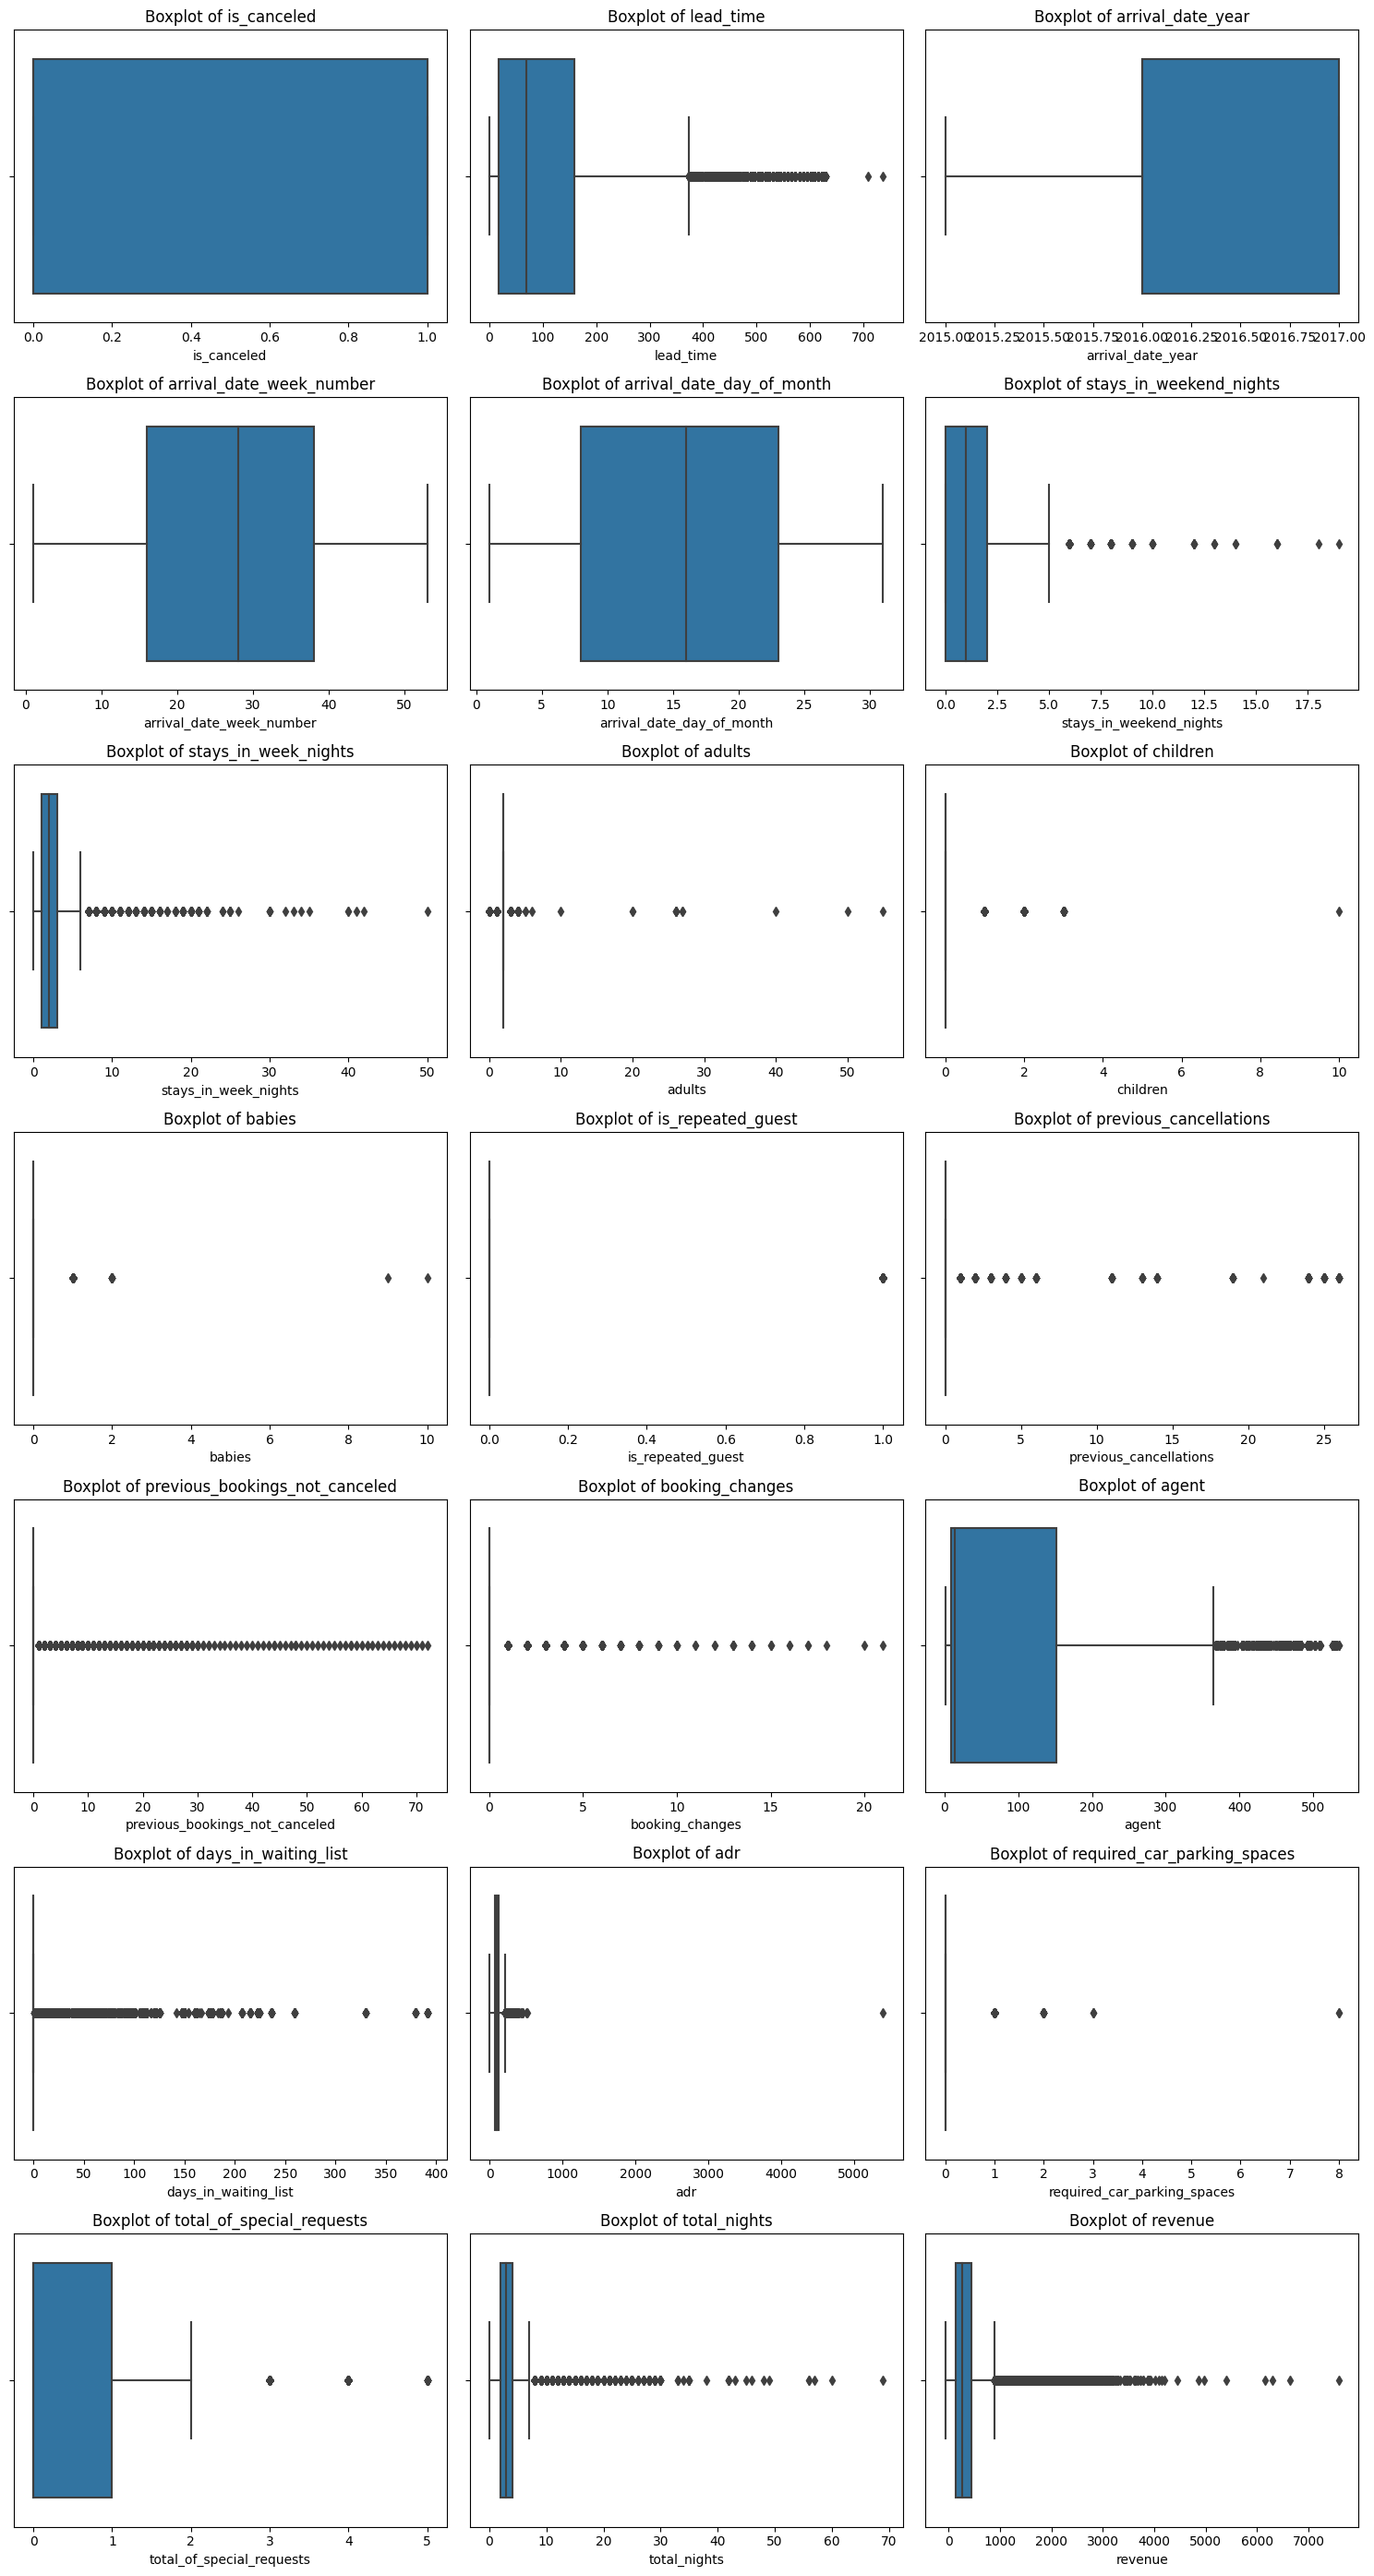

In [62]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

So, we are going to winsorize them so as to perform better at analysis

### Outlier Handling

In [63]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel          0.0      342.0             2015.0               July   
1  Resort Hotel          0.0      373.0             2015.0               July   
2  Resort Hotel          0.0        7.0             2015.0               July   
3  Resort Hotel          0.0       13.0             2015.0               July   
4  Resort Hotel          0.0       14.0             2015.0               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                      27.0                        1.0   
1                      27.0                        1.0   
2                      27.0                        1.0   
3                      27.0                        1.0   
4                      27.0                        1.0   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                      0.0             

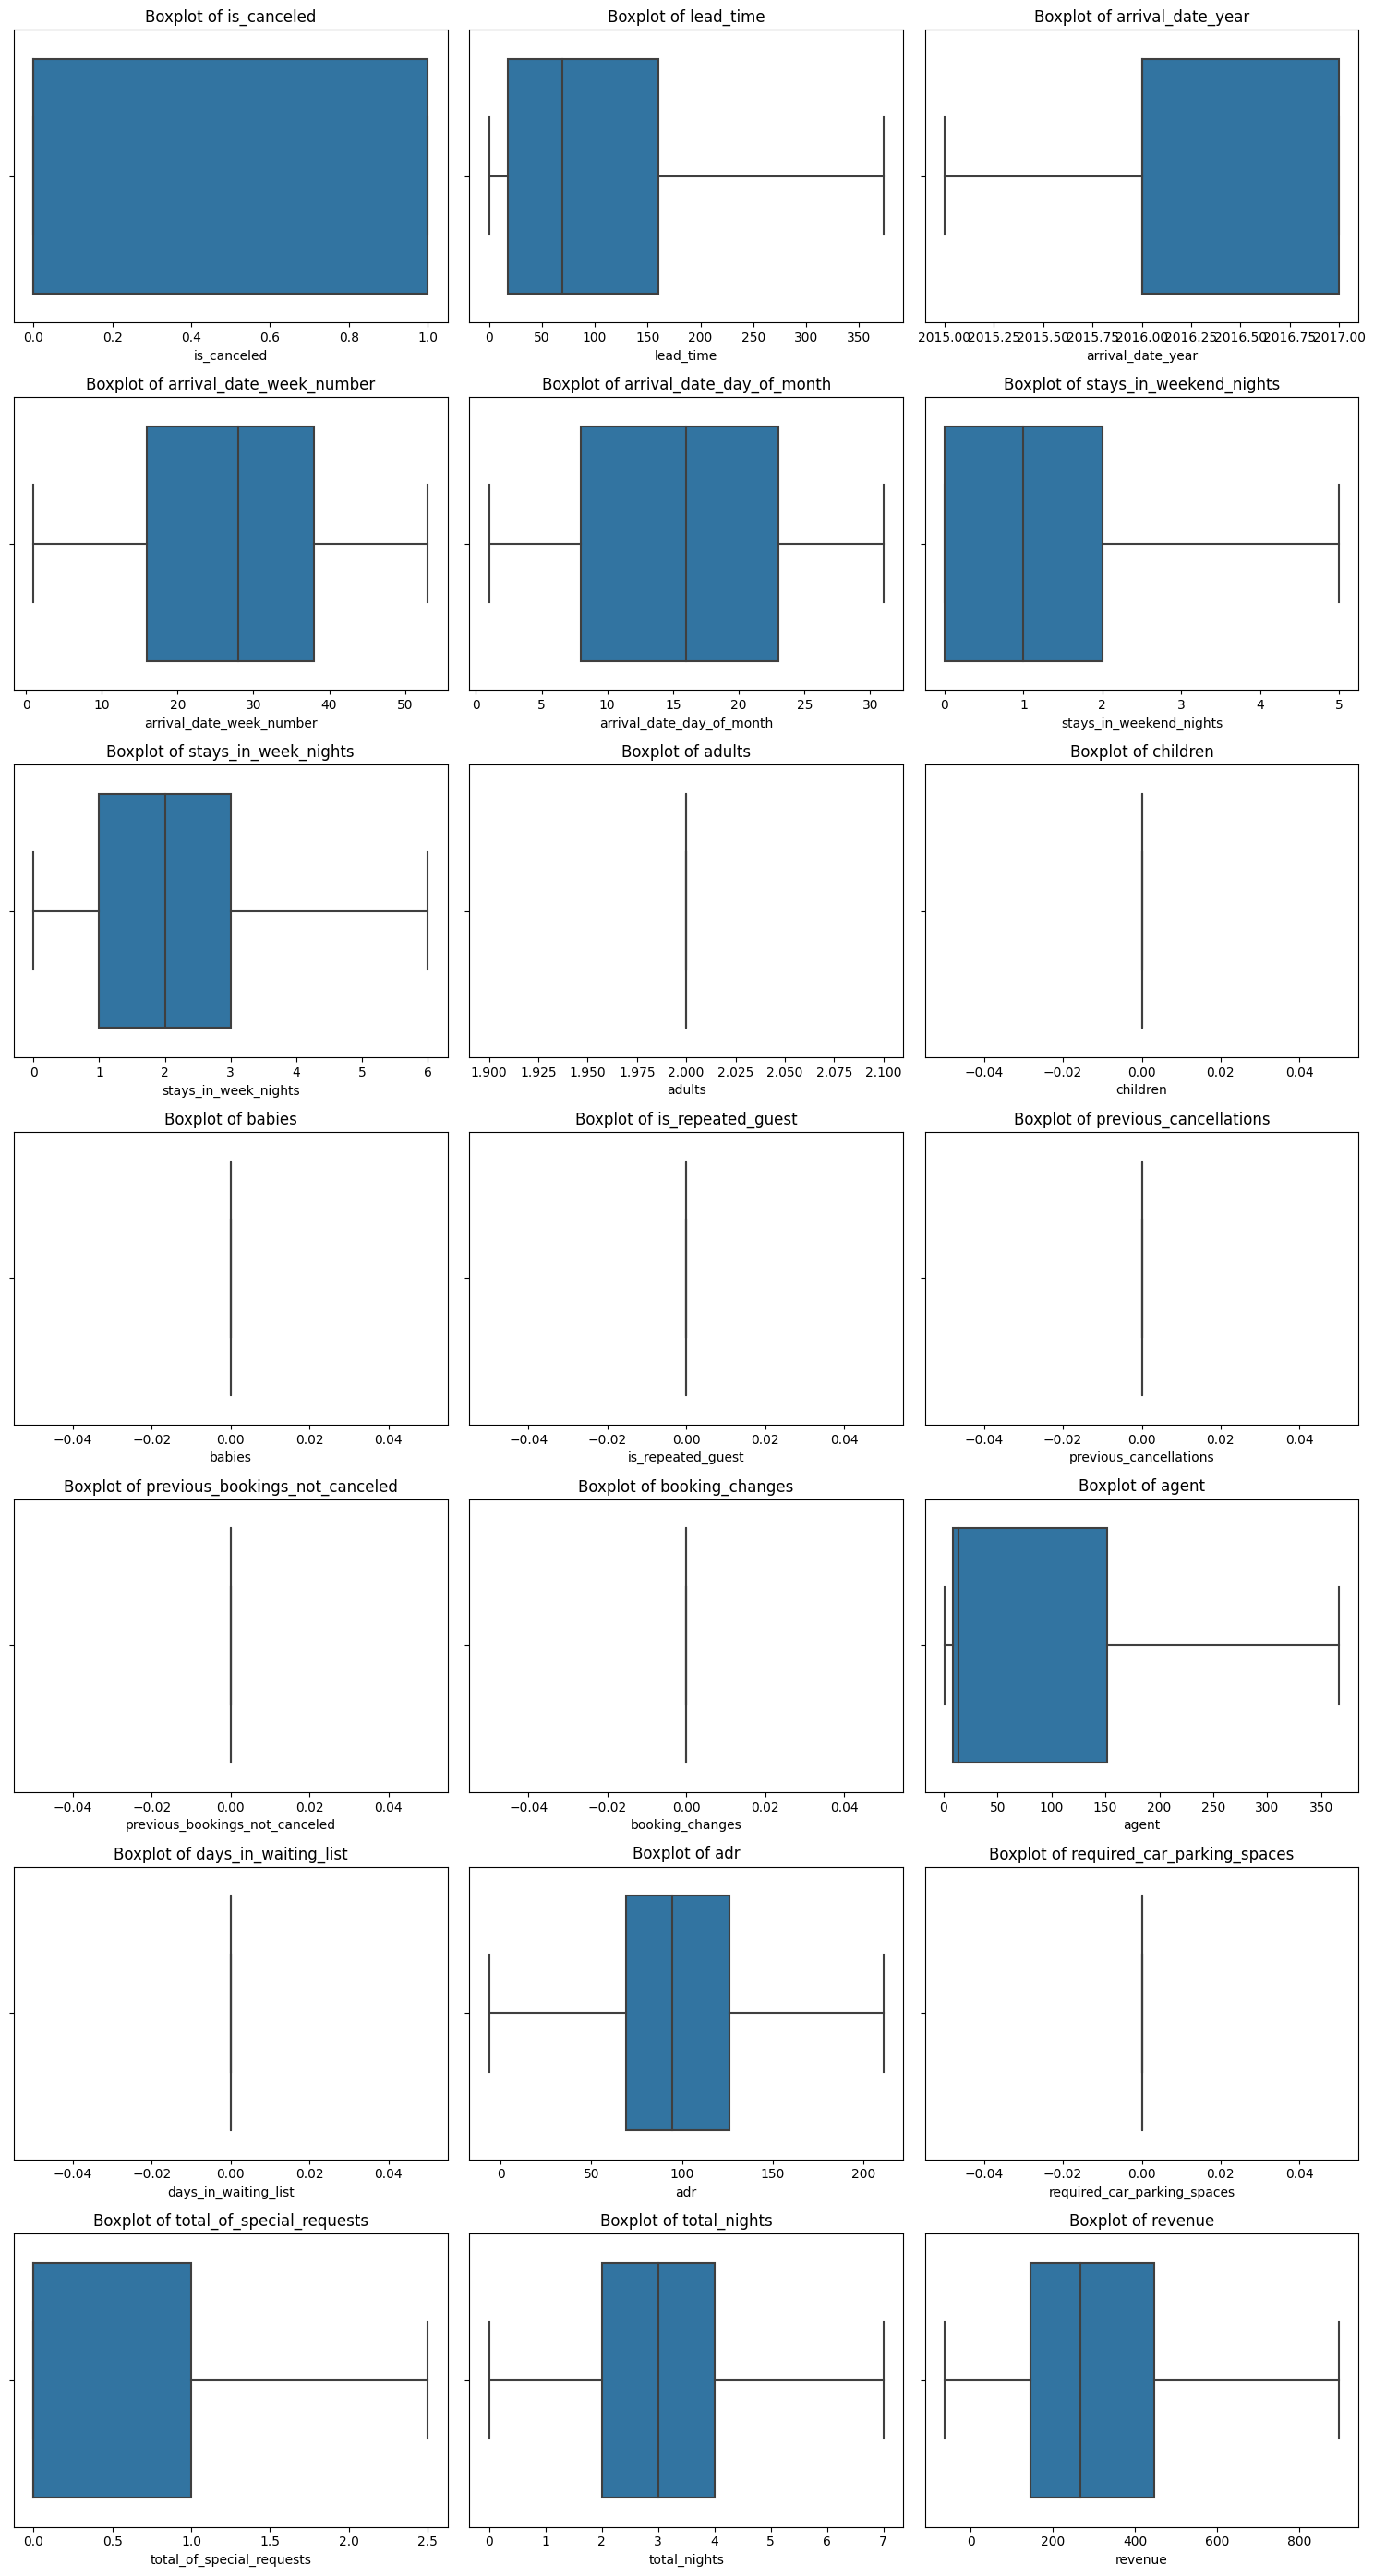

In [64]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## CONCLUSION

This analysis of hotel booking demand has revealed several key insights:

**Data Overview and Cleaning:**
- The dataset contained a significant number of records (119,390) and features (32).
- Initial exploration identified missing values in 'children', 'country', 'agent', and 'company' columns.
- The 'company' column was dropped due to a high percentage of missing values (94.3%).
- Missing values in 'children', 'country', and 'agent' were handled by filling with the median or 'Unknown'.
- Data types were corrected for 'children' and 'agent' (to integer) and 'reservation_status_date' (to datetime).
- Outliers in numerical columns were handled using Winsorization with the IQR method, as visualized by the box plots before and after processing.

**Exploratory Data Analysis Findings:**
- **Hotel Type:** City hotels have significantly more bookings than Resort hotels.
- **Lead Time:** The average lead time for bookings is around 104 days.
- **Arrival Month:** August is the most common arrival month for bookings, followed by July.
- **Cancellations:** A substantial number of bookings were canceled (44,224). The cancellation rate varies seasonally, with higher rates observed in the spring and summer months (April to September), particularly in June.
- **Special Requests:** The average number of special requests per booking is low (around 0.57), with most bookings having 0 or 1 special request.
- **Country:** Portugal (PRT) accounts for the highest number of bookings, followed by the United Kingdom (GBR) and France (FRA).
- **Average Daily Rate (ADR):** City hotels have a slightly higher average ADR than Resort hotels. ADR has shown an increasing trend over the years from 2015 to 2017. Market segments significantly impact ADR, with 'Online TA' and 'Direct' bookings having the highest average ADR. The number of occupants (adults, children, babies) also influences ADR, with combinations of 3 adults and 2 children, or 2 adults and 3 children showing the highest average ADRs among the top combinations.
- **Car Parking:** A relatively small percentage of guests (around 6.21%) required car parking spaces.
- **Stay Duration:** The average stay duration is longer for week nights (around 2.5 nights) compared to weekend nights (around 0.93 nights). New guests tend to have a longer average stay duration than repeated guests.
- **Distribution Channel:** The majority of bookings were made through Travel Agents/Tour Operators (TA/TO).
- **Previous Cancellations:** Resort hotels have a slightly higher average number of previous cancellations compared to City hotels.
- **Lead Time and Cancellation:** There appears to be a positive correlation between lead time and cancellation rate, meaning bookings made further in advance are more likely to be canceled.
- **Booking Changes and Special Requests:** The average number of special requests tends to increase slightly with a small number of booking changes (up to 3-4 changes), potentially indicating that guests making minor adjustments are also more likely to have specific needs. However, for a very high number of booking changes, the average number of special requests can fluctuate significantly, possibly due to smaller sample sizes or different booking dynamics.
- **Market Segment and Lead Time Distribution:** The distribution of lead time varies considerably across market segments. 'Groups' and 'Offline TA/TO' tend to have longer median lead times, while 'Corporate' and 'Direct' bookings have shorter median lead times.

**Factors Impacting Cancellation Rate:**
- Numerical features with the highest positive correlation to cancellation rate include `lead_time`, `previous_cancellations`, `adults`, `days_in_waiting_list`, and `adr`.
- Numerical features with the highest negative correlation to cancellation rate include `total_of_special_requests`, `required_car_parking_spaces`, `booking_changes`, and `is_repeated_guest`. This suggests that guests with more special requests, those who require parking, those who make booking changes, and repeated guests are less likely to cancel.
- Categorical factors such as `hotel` type (City Hotel has a higher cancellation rate), `deposit_type` (Non Refundable deposits have a significantly higher cancellation rate), and `customer_type` also play a role in cancellation probability.

Overall, this analysis provides a comprehensive understanding of the hotel booking demand dataset, highlighting key trends, relationships, and factors influencing booking cancellations and ADR. These insights can be valuable for optimizing pricing strategies, marketing campaigns, and operational management.